In [1]:
from experiment import Experiment
import torch
%matplotlib inline

In [2]:
var_dict = dict(
    categorical_vars = ['Work_accident', 'promotion_last_5years', 'sales', 
                        'salary'],
    numerical_vars = ['satisfaction_level', 'last_evaluation', 'average_montly_hours'
                     ,'number_project','time_spend_company'],
    class_var = 'left'
)

In [3]:
exp = Experiment('data/HR_comma_sep.csv',
                 var_dict,
                 embedding_dim=4,
                 lr=5e-3,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=False,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20])

In [4]:
exp.data.shape

(14999, 10)

In [5]:
%time clf_scores = exp.test_classification_performance(cv=3)

KeyboardInterrupt: 

In [ ]:
exp.print_classification_scores(clf_scores, method='dummy_only')

In [ ]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

In [36]:
exp.print_classification_scores(clf_scores, method='equal_width')

DT performance
#Bins = 2, #Avg Cols = 27.0, Accuracy = 0.858 (+/- 0.027)
#Bins = 3, #Avg Cols = 32.0, Accuracy = 0.927 (+/- 0.008)
#Bins = 4, #Avg Cols = 37.0, Accuracy = 0.916 (+/- 0.005)
#Bins = 5, #Avg Cols = 42.0, Accuracy = 0.922 (+/- 0.012)
#Bins = 6, #Avg Cols = 47.0, Accuracy = 0.931 (+/- 0.008)
#Bins = 7, #Avg Cols = 52.0, Accuracy = 0.941 (+/- 0.006)
#Bins = 8, #Avg Cols = 57.0, Accuracy = 0.928 (+/- 0.004)
#Bins = 9, #Avg Cols = 62.0, Accuracy = 0.938 (+/- 0.003)
#Bins = 10, #Avg Cols = 67.0, Accuracy = 0.929 (+/- 0.006)
#Bins = 11, #Avg Cols = 72.0, Accuracy = 0.939 (+/- 0.013)
#Bins = 12, #Avg Cols = 77.0, Accuracy = 0.945 (+/- 0.015)
#Bins = 13, #Avg Cols = 82.0, Accuracy = 0.930 (+/- 0.014)
#Bins = 14, #Avg Cols = 87.0, Accuracy = 0.941 (+/- 0.015)
#Bins = 15, #Avg Cols = 92.0, Accuracy = 0.941 (+/- 0.012)
#Bins = 16, #Avg Cols = 97.0, Accuracy = 0.932 (+/- 0.006)
#Bins = 17, #Avg Cols = 102.0, Accuracy = 0.934 (+/- 0.007)
#Bins = 18, #Avg Cols = 107.0, Accuracy = 0.933 

In [37]:
exp.print_classification_scores(clf_scores, method='equal_freq')

DT performance
#Bins = 2, #Avg Cols = 27.0, Accuracy = 0.868 (+/- 0.023)
#Bins = 3, #Avg Cols = 32.0, Accuracy = 0.918 (+/- 0.005)
#Bins = 4, #Avg Cols = 36.0, Accuracy = 0.900 (+/- 0.006)
#Bins = 5, #Avg Cols = 39.0, Accuracy = 0.903 (+/- 0.009)
#Bins = 6, #Avg Cols = 43.0, Accuracy = 0.926 (+/- 0.008)
#Bins = 7, #Avg Cols = 46.0, Accuracy = 0.931 (+/- 0.006)
#Bins = 8, #Avg Cols = 49.0, Accuracy = 0.907 (+/- 0.007)
#Bins = 9, #Avg Cols = 52.0, Accuracy = 0.916 (+/- 0.018)
#Bins = 10, #Avg Cols = 55.0, Accuracy = 0.935 (+/- 0.007)
#Bins = 11, #Avg Cols = 59.0, Accuracy = 0.921 (+/- 0.006)
#Bins = 12, #Avg Cols = 62.666666666666664, Accuracy = 0.903 (+/- 0.006)
#Bins = 13, #Avg Cols = 66.0, Accuracy = 0.910 (+/- 0.028)
#Bins = 14, #Avg Cols = 69.0, Accuracy = 0.927 (+/- 0.014)
#Bins = 15, #Avg Cols = 72.0, Accuracy = 0.921 (+/- 0.005)
#Bins = 16, #Avg Cols = 75.0, Accuracy = 0.909 (+/- 0.005)
#Bins = 17, #Avg Cols = 78.0, Accuracy = 0.918 (+/- 0.006)
#Bins = 18, #Avg Cols = 81.0, Accur

In [38]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

DT performance
#Init Bins = 10, #Avg Cols = 32.0, Accuracy = 0.893 (+/- 0.101)
#Init Bins = 15, #Avg Cols = 30.333333333333332, Accuracy = 0.849 (+/- 0.081)
#Init Bins = 20, #Avg Cols = 32.0, Accuracy = 0.908 (+/- 0.018)
LR performance
#Init Bins = 10, #Avg Cols = 32.0, Accuracy = 0.856 (+/- 0.070)
#Init Bins = 15, #Avg Cols = 30.333333333333332, Accuracy = 0.824 (+/- 0.013)
#Init Bins = 20, #Avg Cols = 32.0, Accuracy = 0.859 (+/- 0.013)
NB performance
#Init Bins = 10, #Avg Cols = 32.0, Accuracy = 0.830 (+/- 0.074)
#Init Bins = 15, #Avg Cols = 30.333333333333332, Accuracy = 0.790 (+/- 0.005)
#Init Bins = 20, #Avg Cols = 32.0, Accuracy = 0.841 (+/- 0.016)


In [39]:
%time clustering_scores = exp.test_clustering_performance()

#Init Bin = 10
Learned #Bin by Variables = [2, 3, 4, 2, 3]
#Init Bin = 15
Learned #Bin by Variables = [4, 3, 7, 2, 3]
#Init Bin = 20
Learned #Bin by Variables = [2, 3, 4, 3, 3]
CPU times: user 11min 34s, sys: 2min 52s, total: 14min 26s
Wall time: 11min 18s


In [40]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 22, NMI = 0.0019
agglomerative, #Cols = 22, NMI = 0.0054


In [41]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 22, NMI = 0.0410
agglomerative, #Cols = 22, NMI = 0.0820


In [42]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 2, #Cols = 27, #NMI = 0.0028
#Bins = 3, #Cols = 32, #NMI = 0.0007
#Bins = 4, #Cols = 37, #NMI = 0.0148
#Bins = 5, #Cols = 42, #NMI = 0.0522
#Bins = 6, #Cols = 47, #NMI = 0.0148
#Bins = 7, #Cols = 52, #NMI = 0.0148
#Bins = 8, #Cols = 57, #NMI = 0.0148
#Bins = 9, #Cols = 62, #NMI = 0.0148
#Bins = 10, #Cols = 67, #NMI = 0.0148
#Bins = 11, #Cols = 72, #NMI = 0.0148
#Bins = 12, #Cols = 77, #NMI = 0.0148
#Bins = 13, #Cols = 82, #NMI = 0.0148
#Bins = 14, #Cols = 87, #NMI = 0.0148
#Bins = 15, #Cols = 92, #NMI = 0.0148
#Bins = 16, #Cols = 97, #NMI = 0.0148
#Bins = 17, #Cols = 102, #NMI = 0.0148
#Bins = 18, #Cols = 107, #NMI = 0.0148
#Bins = 19, #Cols = 112, #NMI = 0.0148
#Bins = 20, #Cols = 117, #NMI = 0.0148
agglomerative
#Bins = 2, #Cols = 27, #NMI = 0.0487
#Bins = 3, #Cols = 32, #NMI = 0.0161
#Bins = 4, #Cols = 37, #NMI = 0.1165
#Bins = 5, #Cols = 42, #NMI = 0.0654
#Bins = 6, #Cols = 47, #NMI = 0.2805
#Bins = 7, #Cols = 52, #NMI = 0.2637
#Bins = 8, #Cols = 57, #NMI = 0.2613
#B

In [43]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 2, #Cols = 27, #NMI = 0.0068
#Bins = 3, #Cols = 32, #NMI = 0.0194
#Bins = 4, #Cols = 36, #NMI = 0.0148
#Bins = 5, #Cols = 39, #NMI = 0.0148
#Bins = 6, #Cols = 43, #NMI = 0.0148
#Bins = 7, #Cols = 46, #NMI = 0.0148
#Bins = 8, #Cols = 49, #NMI = 0.0148
#Bins = 9, #Cols = 52, #NMI = 0.0148
#Bins = 10, #Cols = 55, #NMI = 0.0148
#Bins = 11, #Cols = 59, #NMI = 0.0148
#Bins = 12, #Cols = 63, #NMI = 0.0148
#Bins = 13, #Cols = 66, #NMI = 0.0148
#Bins = 14, #Cols = 69, #NMI = 0.0148
#Bins = 15, #Cols = 72, #NMI = 0.0148
#Bins = 16, #Cols = 75, #NMI = 0.0148
#Bins = 17, #Cols = 78, #NMI = 0.0148
#Bins = 18, #Cols = 81, #NMI = 0.0148
#Bins = 19, #Cols = 84, #NMI = 0.0148
#Bins = 20, #Cols = 87, #NMI = 0.0148
agglomerative
#Bins = 2, #Cols = 27, #NMI = 0.0062
#Bins = 3, #Cols = 32, #NMI = 0.2919
#Bins = 4, #Cols = 36, #NMI = 0.0745
#Bins = 5, #Cols = 39, #NMI = 0.0591
#Bins = 6, #Cols = 43, #NMI = 0.1087
#Bins = 7, #Cols = 46, #NMI = 0.1003
#Bins = 8, #Cols = 49, #NMI = 0.0197
#Bins 

In [44]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 10, #Cols = 31, NMI = 0.0148
#Init Bins = 15, #Cols = 36, NMI = 0.0511
#Init Bins = 20, #Cols = 32, NMI = 0.0007
agglomerative
#Init Bins = 10, #Cols = 31, NMI = 0.1914
#Init Bins = 15, #Cols = 36, NMI = 0.0589
#Init Bins = 20, #Cols = 32, NMI = 0.0451


In [4]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=4, batch_size=1024, 
                     n_epoch=30, lr=1e-2, weight_decay=0.0, verbose=True)
sb.fit(exp.data, n_init_bins=30)

>>> Epoch = 1, Loss = 0.2033427655696869
[2, 27, 29, 4, 3] 0.150677246046
>>> Epoch = 2, Loss = 0.18108566105365753
[2, 28, 29, 4, 3] 0.232297133436
>>> Epoch = 3, Loss = 0.18104076385498047
[2, 27, 28, 4, 3] 0.176999902595
>>> Epoch = 4, Loss = 0.178199902176857
[29, 28, 29, 3, 3] 0.135211100503


/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


>>> Epoch = 5, Loss = 0.17971834540367126
[2, 3, 29, 4, 4] 0.109284989817
>>> Epoch = 6, Loss = 0.17861586809158325
[2, 2, 2, 3, 4] 0.116066707637
>>> Epoch = 7, Loss = 0.17834064364433289
[29, 2, 2, 3, 4] 0.136083021369
>>> Epoch = 8, Loss = 0.17907267808914185
[2, 2, 2, 2, 4] 0.197682041358
>>> Epoch = 9, Loss = 0.17814643681049347
[2, 2, 2, 3, 4] 0.242828428067
>>> Epoch = 10, Loss = 0.17815907299518585
[29, 2, 28, 3, 4] 0.302437974151
>>> Epoch = 11, Loss = 0.17747224867343903
[2, 2, 27, 3, 5] 0.301057564787
>>> Epoch = 12, Loss = 0.17685185372829437
[29, 2, 2, 3, 2] 0.314481996533
>>> Epoch = 13, Loss = 0.1773761361837387
[29, 2, 2, 3, 2] 0.333740253573
>>> Epoch = 14, Loss = 0.17604950070381165
[28, 2, 2, 3, 5] 0.341425342699
>>> Epoch = 15, Loss = 0.17630250751972198
[28, 2, 2, 3, 2] 0.455359764048
>>> Epoch = 16, Loss = 0.1753763109445572
[29, 2, 2, 2, 2] 0.488204439313
>>> Epoch = 17, Loss = 0.17406371235847473
[11, 2, 3, 2, 2] 0.49647397398
>>> Epoch = 18, Loss = 0.1760906279

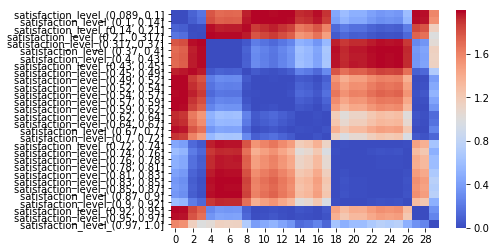

In [5]:
sb.plot_pairwise_distance_between_bins('satisfaction_level')

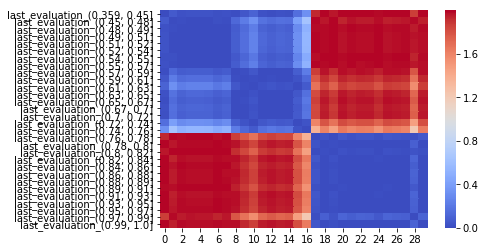

In [6]:
sb.plot_pairwise_distance_between_bins('last_evaluation')

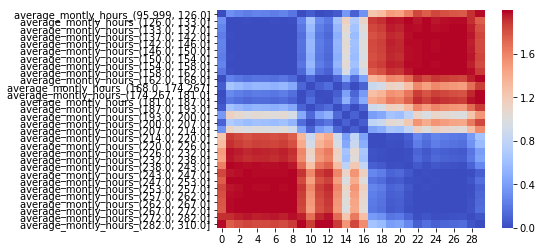

In [7]:
sb.plot_pairwise_distance_between_bins('average_montly_hours')

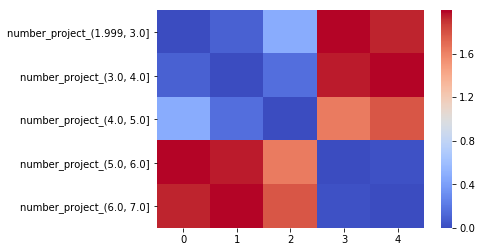

In [8]:
sb.plot_pairwise_distance_between_bins('number_project')

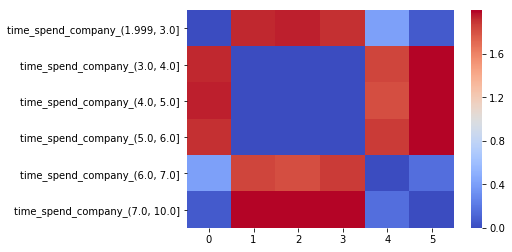

In [9]:
sb.plot_pairwise_distance_between_bins('time_spend_company')

In [10]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

satisfaction_level
['(0.089, 0.14]', '(0.14, 0.317]', '(0.317, 0.45]', '(0.45, 0.49]', '(0.49, 0.62]', '(0.62, 0.72]', '(0.72, 0.92]', '(0.92, 0.97]', '(0.97, 1.0]']
last_evaluation
['(0.359, 0.76]', '(0.76, 1.0]']
average_montly_hours
['(95.999, 214.0]', '(214.0, 310.0]']
number_project
['(1.999, 5.0]', '(5.0, 7.0]']
time_spend_company
['(1.999, 3.0]', '(3.0, 6.0]', '(6.0, 10.0]']


In [40]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
AgglomerativeClustering

In [12]:
### 학습된 트리의 깊이, 형태 비교

In [13]:
# dot_data = StringIO()
# export_graphviz(dt, out_file=dot_data, feature_names=X.columns, 
#                 impurity=False, proportion=True)
# graph = pydot.graph_from_dot_data(dot_data.getvalue())